1.Средствами SymPy решите систему алгебраических уравнений

${x^2}+{y^2}={a^2}$

${x^2}-y={b^2}$

относительно x, y. Сколько корней уравнений Вы получили?
Постройте график зависимости одного из корней от параметра a для нескольких
значений b.

2.На занятии мы анализировали открытые данные по эпидемии Covid-19.
Загрузите актуальные данные worldometer в DataFrame. Постройте DataFrame,
содержащий только удельные данные по странам. Постройте две диаграммы
рассеяния, первая для числа тестов от числа заболевших, вторая число смертей
от числа тестов.

Всего решений:  4


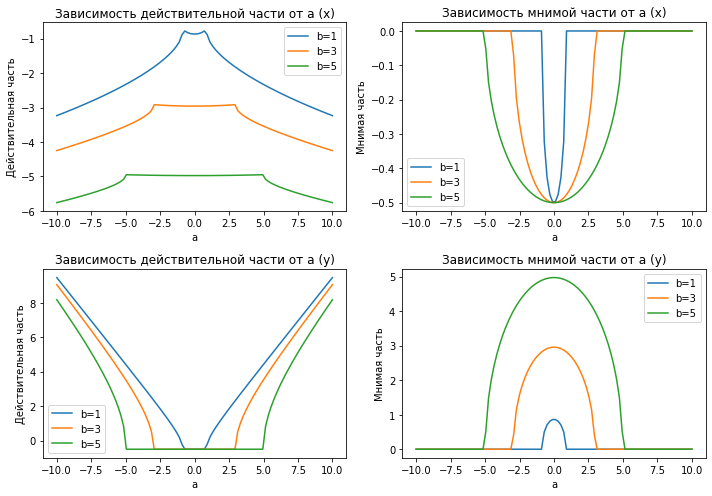

Все решения:


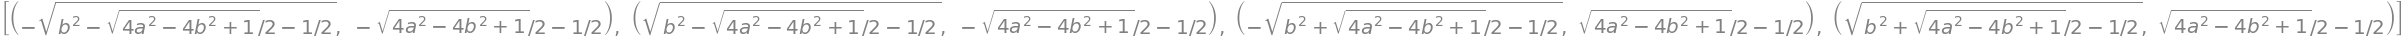

In [14]:
from sympy.abc import x, y, a, b
from sympy import solve, lambdify, init_printing
import numpy as np
import matplotlib.pyplot as plt
init_printing()


def draw(s, aa, b, n):
    x, y = s[n][0], s[n][1]
    fig = plt.figure(figsize=(10, 7))
    ax1, ax2 = fig.add_subplot(2, 2, 1), fig.add_subplot(2, 2, 2)
    ax3, ax4 = fig.add_subplot(2, 2, 3), fig.add_subplot(2, 2, 4)
    ax1.set_title('Зависимость действительной части от а (x)')
    ax2.set_title('Зависимость мнимой части от а (x)')
    ax3.set_title('Зависимость действительной части от а (y)')
    ax4.set_title('Зависимость мнимой части от а (y)')
    for j in b:
        xs = lambdify(a, x.subs({'b': j}), 'numpy')(aa + 0j)
        ys = lambdify(a, y.subs({'b': j}), 'numpy')(aa + 0j)
        ax1.plot(aa, xs.real, label=f'b={j}'), ax2.plot(aa, xs.imag, label=f'b={j}')
        ax3.plot(aa, ys.real, label=f'b={j}'), ax4.plot(aa, ys.imag, label=f'b={j}')
    ax1.set_xlabel('а'), ax1.set_ylabel('Действительная часть')
    ax2.set_xlabel('а'), ax2.set_ylabel('Мнимая часть')
    ax3.set_xlabel('а'), ax3.set_ylabel('Действительная часть')
    ax4.set_xlabel('а'), ax4.set_ylabel('Мнимая часть')
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()
    plt.tight_layout()
    plt.show()


aa = np.linspace(-10, 10, 100)
bb = np.array([1, 3, 5])
eqs = [x**2 + y**2 - a**2, x**2 - y - b**2]
s = solve(eqs, (x, y))
print('Всего решений: ', len(s))# 4 пары решений
n = 2 # Номер решения
draw(s, aa, bb, n)
print('Все решения:')
s

In [15]:
import covid
import pandas as pd

covid_world = covid.Covid(source='worldometers').get_data()
df = pd.DataFrame(covid_world)
not_country = ('North America', 'Asia', 'South America', 'Europe', 'Africa', 'World', 'South Africa')
excluded = df[~df.country.isin(not_country)].sort_values(by='total_deaths_per_million', ascending=False)
new_df = excluded[['country', 'total_tests_per_million', 'total_cases_per_million', 'total_deaths_per_million', 'population']]
new_df = new_df.loc[new_df['total_tests_per_million'] != 0] # Выбираем строки, где total_tests_per_million не равно 0
new_df

,country,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population


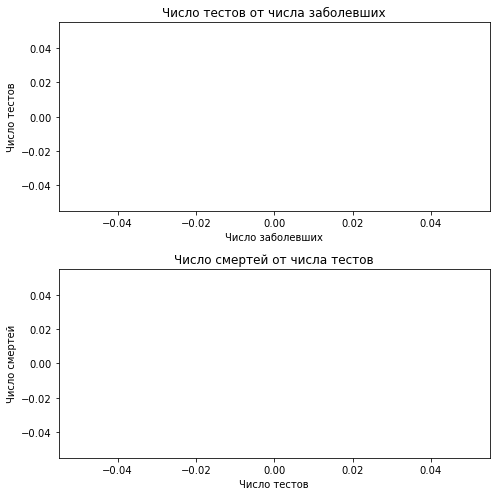

In [16]:
fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.set_title('Число тестов от числа заболевших')
ax2.set_title('Число смертей от числа тестов')
ax1.set_xlabel('Число заболевших')
ax1.set_ylabel('Число тестов')
ax2.set_xlabel('Число тестов')
ax2.set_ylabel('Число смертей')
ax1.scatter(new_df.total_cases_per_million, new_df.total_tests_per_million)
ax2.scatter(new_df.total_tests_per_million, new_df.total_deaths_per_million)
plt.tight_layout()
plt.show()